In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
BlackFriday = pd.read_csv('BlackFriday.csv')
BlackFriday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [3]:
BlackFriday.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


Text(0.5,1,'Gender Ratio of Cunsumer')

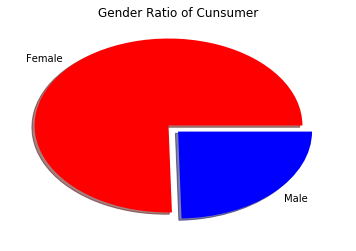

In [4]:
Genders=BlackFriday.Gender.value_counts()
plt.pie(Genders, labels=['Female','Male'],colors=['r','b'],shadow=True, explode=(0.1,0))

plt.title('Gender Ratio of Cunsumer')
# show shopping involvement by genders

Text(0,0.5,'Gender')

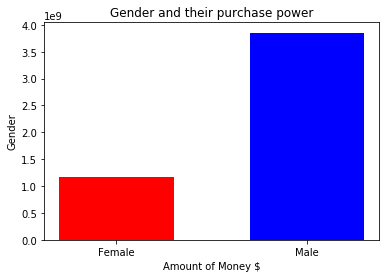

In [5]:
Amount_by_Genders = BlackFriday.groupby(['Gender'])['Purchase'].sum()
x_label=['Female','Male']

plt.bar(x_label, Amount_by_Genders.values, color=['r','b'],width=0.6)
plt.title('Gender and their purchase power')
plt.xlabel('Amount of Money $')
plt.ylabel('Gender')
# show how much money spent by male and female customers

In [6]:
Amount_by_Genders.values

array([1164624021, 3853044357], dtype=int64)

In [7]:
City_Gender_Dist = BlackFriday.groupby(['Gender','City_Category'])['Purchase'].sum()

In [8]:
BF_Copy=BlackFriday
BF_Copy=BF_Copy.drop(['User_ID','Product_ID','Product_Category_2','Product_Category_3'],axis=1)
# drop some columns

In [9]:
# Data Washing
from scipy.stats import zscore
BF_Copy=BF_Copy.replace({'Stay_In_Current_City_Years':{'4+':'4'}})
BF_Copy = BF_Copy.replace({'City_Category':{'A':int(1),'B':int(2),'C':int(3)}})
BF_Copy = BF_Copy.replace({'Age':{'0-17':int(1),'18-25':int(2),'26-35':int(3),
                                 '36-45':int(4),'46-50':int(5),'51-55':int(6),
                                 '55+':int(7)}})
BF_Copy = BF_Copy.replace({'Gender':{"F":int(1),"M":int(2)}})
BF_Copy.Purchase = zscore(BF_Copy.Purchase)

In [10]:
label=BF_Copy.Gender
X_temp=BF_Copy.drop('Gender',axis=1)

In [11]:
def split_train_test(data, test_ratio):
    np.random.seed=100
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_set_indices = shuffled_indices[:test_set_size]
    train_set_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_set_indices], data.iloc[test_set_indices]

In [12]:

X_train, X_test = split_train_test(X_temp, 0.2)
y_train, y_test = split_train_test(label, 0.2)

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
dt_clf= DecisionTreeClassifier(criterion='entropy')

In [15]:
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [16]:
y_pred=dt_clf.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.6187136678602986

In [18]:
X_train.columns

Index(['Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years',
       'Marital_Status', 'Product_Category_1', 'Purchase'],
      dtype='object')

In [20]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf,
               feature_names = X_train.columns,
               class_names=['female','male'],
               rounded=True,
               filled=True)

C:\Users\march\Anaconda3\lib\site-packages\sklearn\tree\export.py:399: DeprecationWarning: out_file can be set to None starting from 0.18. This will be the default in 0.20.
  DeprecationWarning)
